In [1]:
# %matplotlib widget


In [2]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
# import proplot as pplt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd
from matplotlib.ticker import FuncFormatter, MultipleLocator, LogLocator
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import colorbrewer
from scipy.linalg import norm

In [3]:
sns.set_context("paper",font_scale=2.)
txt_size = 30
ttl_size = 48
lw = 5
params = {'figure.figsize': (15, 5),
         'axes.titlesize':40,
         'xtick.labelsize':txt_size,
         'ytick.labelsize': txt_size,
        'axes.labelsize': txt_size}
#           'legend.fontsize': 'x-large',
plt.rcParams.update(params)

In [4]:
lcc = np.load('limitcycle_adj_other.npz')
lcc.files
tmp = lcc['adj1']
tmp /= np.abs(lcc['adj1']).max()

tmp2 = lcc['adj2']
tmp2 /= np.abs(lcc['adj2']).max()
lc = { "adjoints": [tmp,tmp2], "ts":{"adjoints":lcc['time_adj'], "forward":lcc['time_fwd']}, "forward":lcc['fwd'] }

In [5]:
eocc = np.load('eoc_adj.npz')
tmp = eocc['adjsol1']
tmp /= np.abs(eocc['adjsol1']).max()

tmp2 = eocc['adjsol2']
tmp2 /=np.abs(eocc['adjsol2']).max()

eoc = { "adjoints": [tmp,tmp2], "ts":{"adjoints":[eocc['t1'],eocc['t2']], "forward":eocc['tfwd']}, "forward":eocc['fwdsol'] }

In [87]:
dc.files

['def_adj1',
 'def_fwd1',
 'def_adj0',
 'def_fwd0',
 'lc_adj1',
 'lc_fwd1',
 'lc_adj0',
 'lc_fwd0']

In [99]:
dc = np.load('discrete_time_normal.npz')
# dc = np.load('discrete_time.npz')
tmp = dc['def_adj1']
tmp /= np.abs(dc['def_adj1']).max()

tmp2 = dc['def_adj0']
tmp2 /=np.abs(dc['def_adj0']).max()

eocrnn = { "adjoints": [tmp,tmp2], "forward":dc['def_fwd1'] }

In [100]:
tmp = dc['lc_adj1']
tmp /= np.abs(dc['lc_adj1']).max()

tmp2 = dc['lc_adj0']
tmp2 /=np.abs(dc['lc_adj0']).max()

lcrnn = { "adjoints": [tmp,tmp2], "forward":dc['lc_fwd1'] }

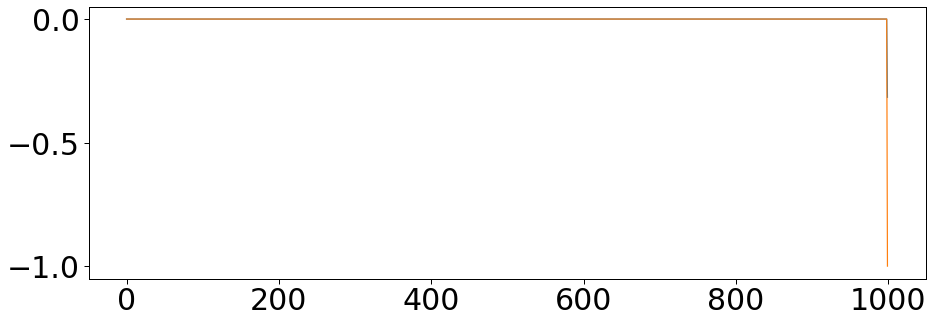

In [16]:
plt.plot(eocrnn['adjoints'][0].T)

Text(-0.75, 0, 'Glorot')

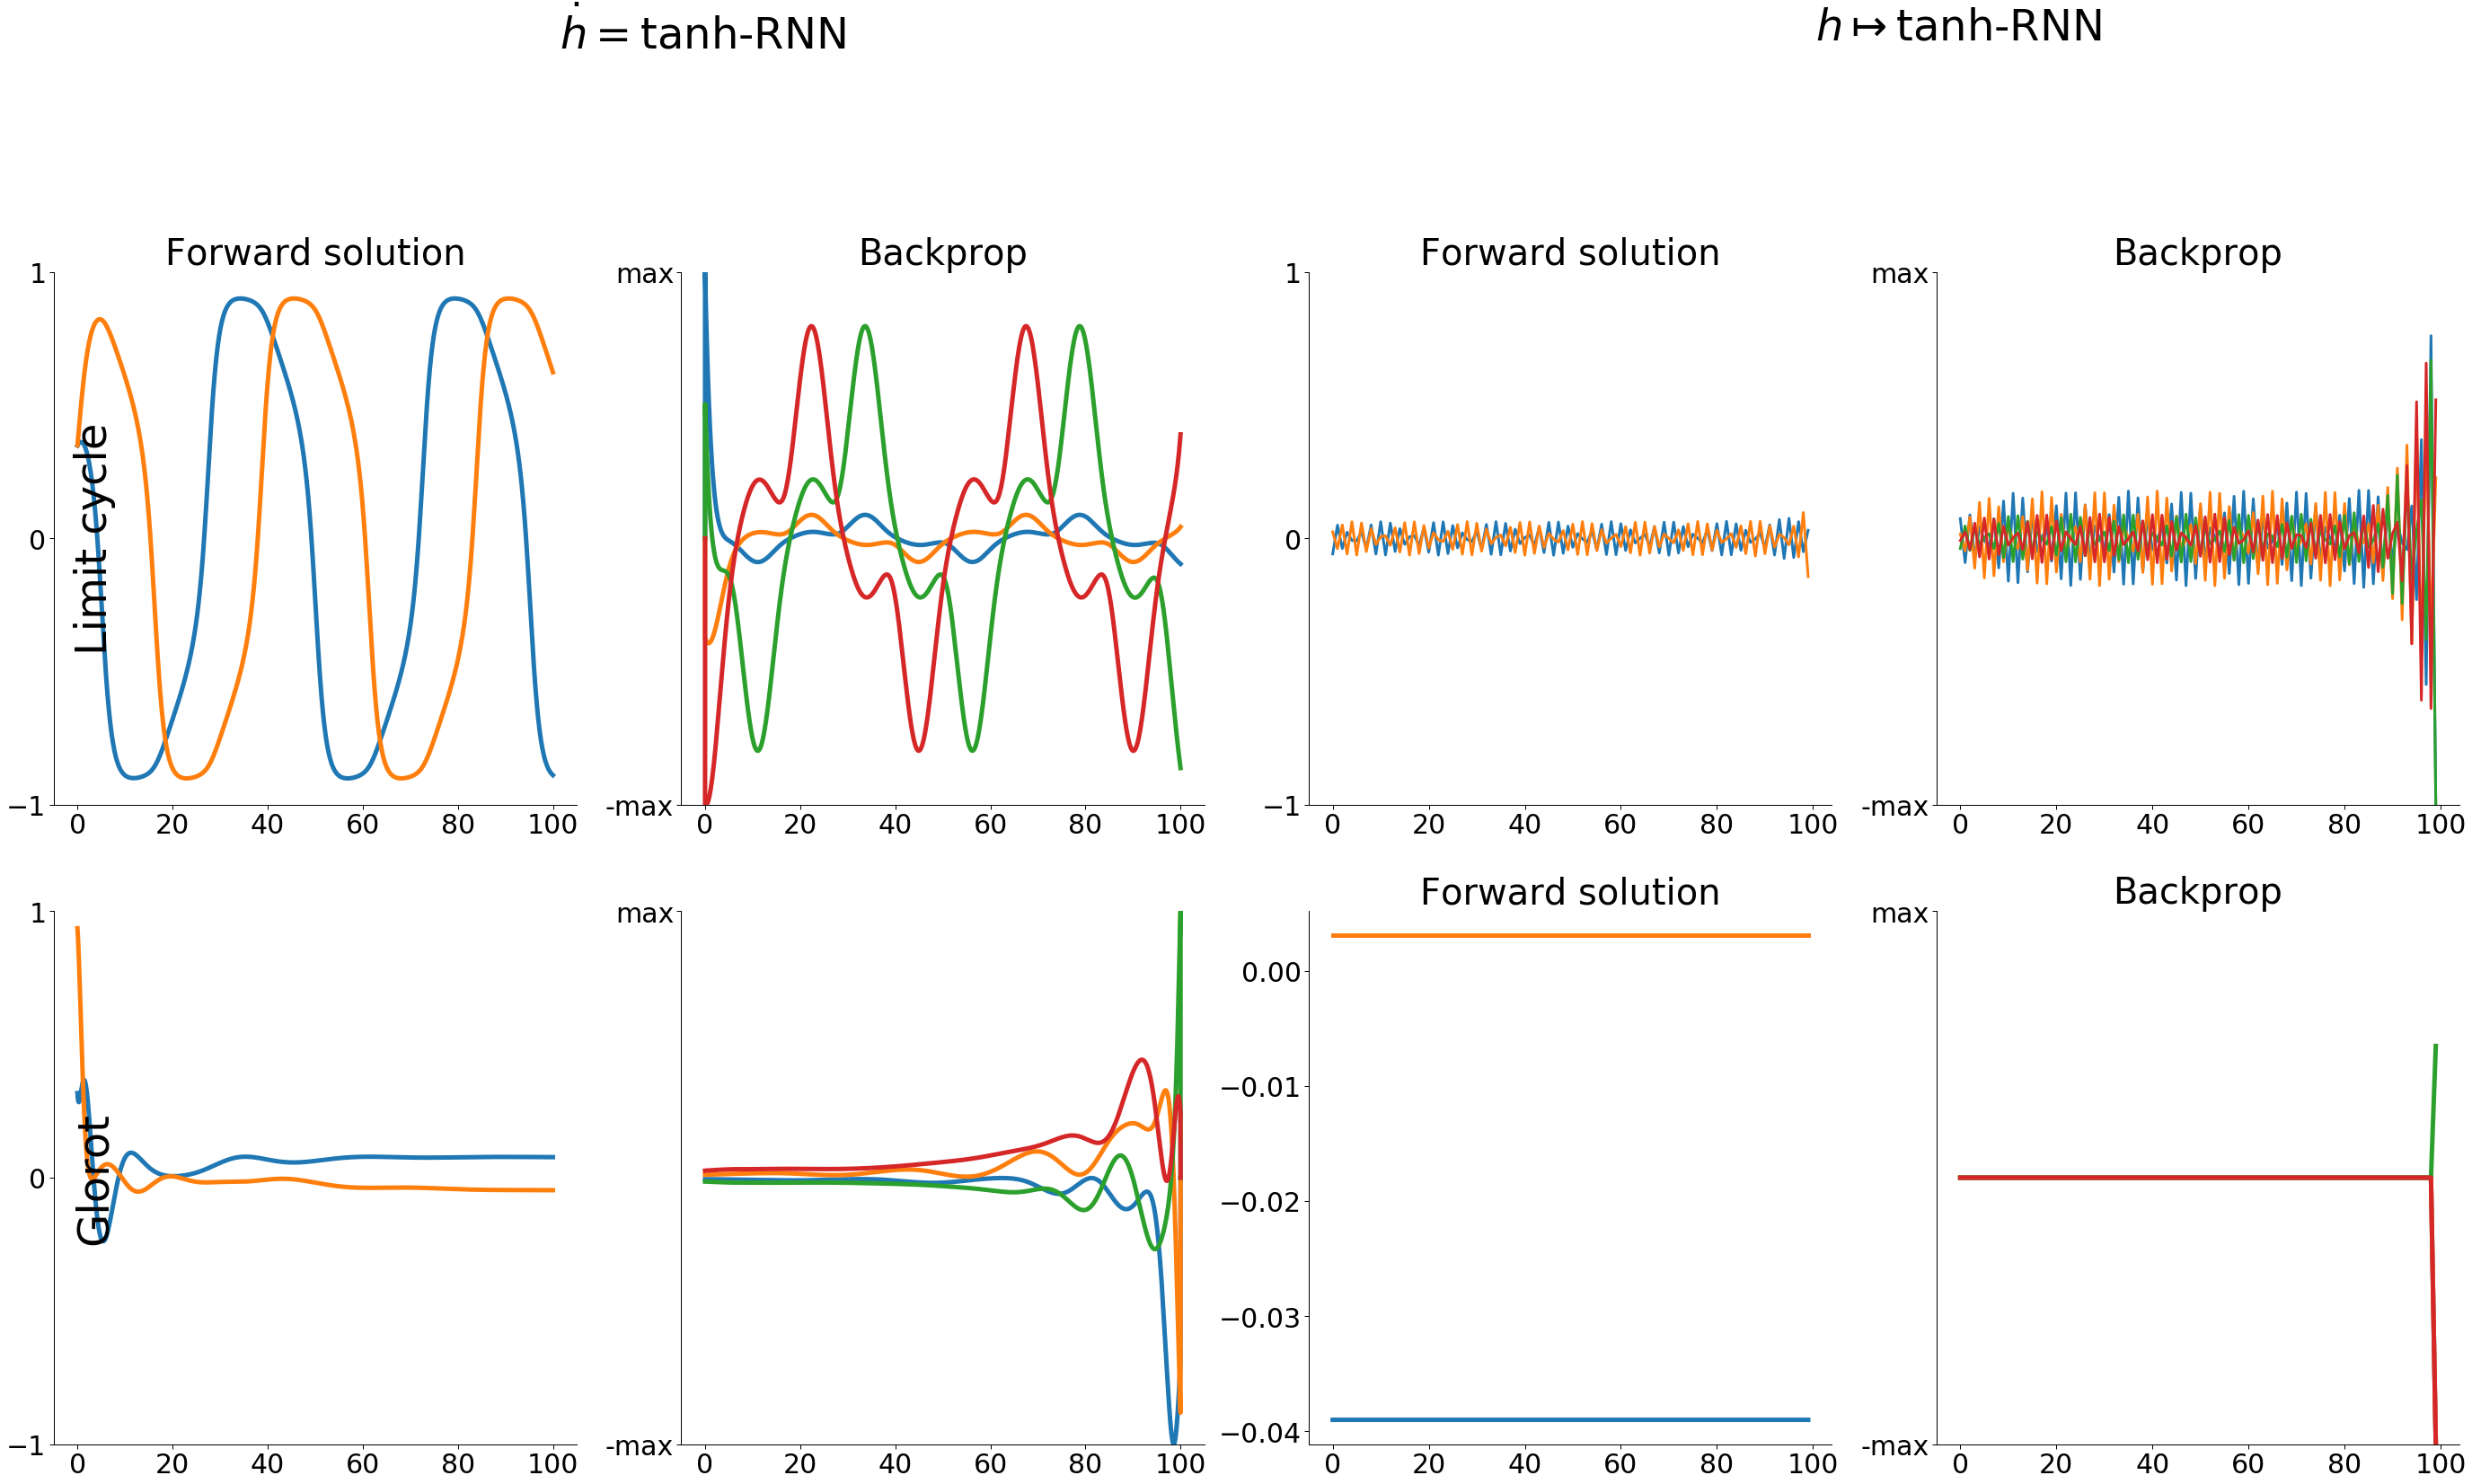

In [131]:
ncols = 4
nrows = 2
width = 12
fig = plt.figure(figsize=(ncols*width,nrows*width), constrained_layout=True)
gs0 = gridspec.GridSpec(2, 4)
axs = [fig.add_subplot(gs0[i]) for i in range(8)]

# LC continuous time
axs[0].plot(lc['ts']['forward'],lc['forward'].T,linewidth=lw)
axs[0].set_title(r"Forward solution")
for adj in lc['adjoints']:
    axs[1].plot(lc['ts']['adjoints'],adj,linewidth=lw)
axs[1].set_title(r"Backprop")

# Vanilla continuous time
axs[4].plot(eoc['ts']['forward'],eoc['forward'].T[:,0:2],linewidth=lw)
# axs[4].set_title(r"Forward solution")
for idx, adj in enumerate(eoc['adjoints']):
    axs[5].plot(eoc['ts']['adjoints'][idx],adj,linewidth=lw)
# axs[5].set_title(r"Backprop")

# LC discrete time
axs[2].plot(lcrnn['forward'].T,linewidth=3)
axs[2].set_title(r"Forward solution")
for adj in lcrnn['adjoints']:
    axs[3].plot(adj.T,linewidth=3)
axs[3].set_title(r"Backprop")

# # Vanilla discrete time
axs[6].plot(eocrnn['forward'].T,linewidth=lw)
axs[6].set_title(r"Forward solution")
for adj in eocrnn['adjoints']:
    axs[7].plot(adj.T,linewidth=lw)
axs[7].set_title(r"Backprop")


for idx in range(0,8,2):
    if idx != 6:
        axs[idx].set_ylim([-1.,1.])
        axs[idx].yaxis.set_major_locator(MultipleLocator(base=1.))

for idx in range(1,9,2):
    axs[idx].set_ylim([-1.,1])
    axs[idx].set_yticks([-1,1])
    axs[idx].set_yticklabels(['-max','max'])

sns.despine()

axs[1].text(0,2,r"$\dot{h}=\mathrm{tanh}$-RNN ", size=ttl_size, verticalalignment='top',
                           horizontalalignment='center', rotation=0)

axs[3].text(0,2,r"$h \mapsto \mathrm{tanh}$-RNN ", size=ttl_size, verticalalignment='top',
                           horizontalalignment='center', rotation=0)


axs[0].text(-0.75,0,"Limit cycle", size=ttl_size, verticalalignment='center',
                           horizontalalignment='left', rotation=90)

axs[4].text(-0.75,0,"Glorot", size=ttl_size, verticalalignment='center',
                           horizontalalignment='left', rotation=90)


In [132]:
fig.savefig("Fig1.pdf",dpi=600)